# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [8]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



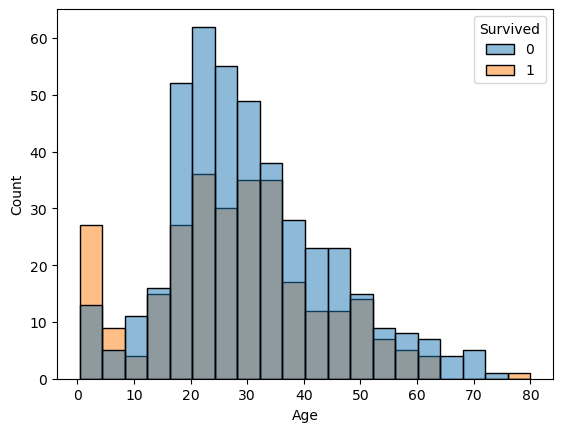

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

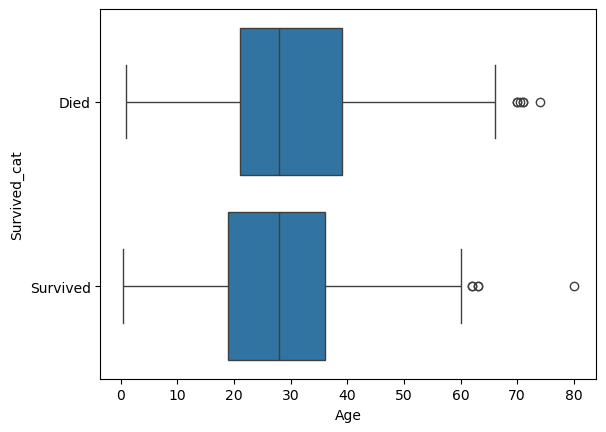

In [10]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [11]:
df['Survived'].dtype

dtype('int64')

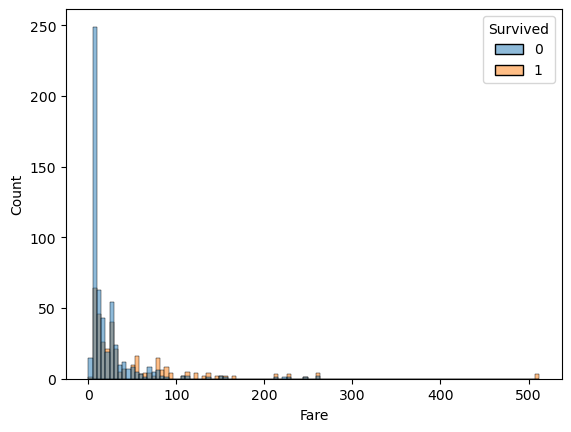

In [12]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

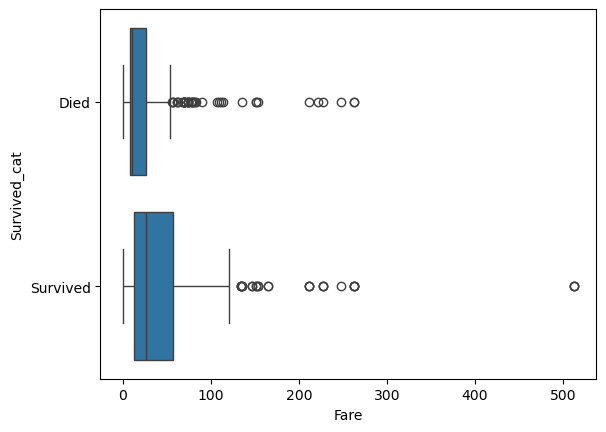

In [13]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

In [14]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv('titanic_passengers.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:

# Categorize Age (0-12 as Child, 13-60 as Adult, 60+ as Senior)
df['Age_cat'] = pd.cut(df['Age'], bins=[0, 12, 60, 100], labels=['Child', 'Adult', 'Senior'])

# Categorize Fare (Low: 0-10, Mid: 10-50, High: 50+)
df['Fare_cat'] = pd.cut(df['Fare'], bins=[0, 10, 50, 1000], labels=['Low Fare', 'Mid Fare', 'High Fare'])

# Check the data after categorization
df[['Age', 'Age_cat', 'Fare', 'Fare_cat']].head()

,Age,Age_cat,Fare,Fare_cat
0,22.0,Adult,7.2500,Low Fare
1,38.0,Adult,71.2833,High Fare
2,26.0,Adult,7.9250,Low Fare
3,35.0,Adult,53.1000,High Fare
4,35.0,Adult,8.0500,Low Fare


In [16]:
# Filter for passengers most likely to survive (Female, 1st class, Young Adults, Children)
most_likely = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Age'] <= 60)]

# Check how many passengers fit this profile
most_likely.shape


(83, 14)

In [17]:
# Filter for passengers least likely to survive (Male, 3rd class, Older adults/Seniors)
least_likely = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Age'] >= 60)]

# Check how many passengers fit this profile
least_likely.shape


(4, 14)

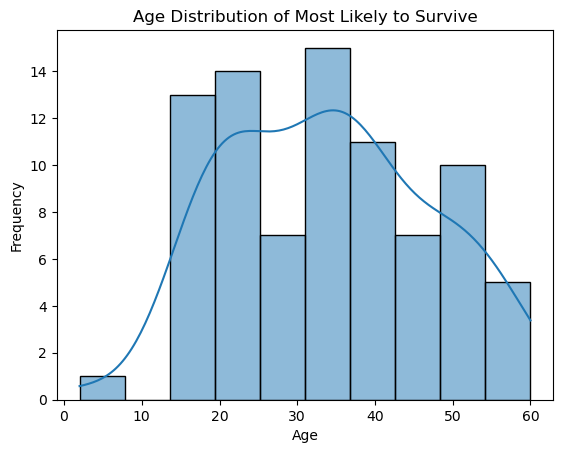

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Age distribution of the most likely to survive profile
sns.histplot(most_likely['Age'], bins=10, kde=True)
plt.title("Age Distribution of Most Likely to Survive")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


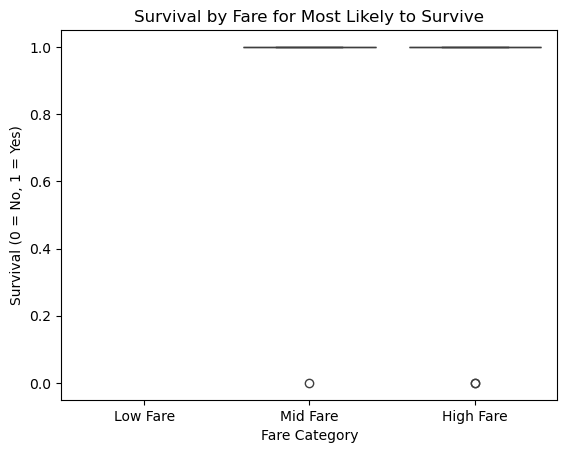

In [19]:
# Visualize Fare distribution of the most likely to survive profile
sns.boxplot(x='Fare_cat', y='Survived', data=most_likely)
plt.title("Survival by Fare for Most Likely to Survive")
plt.xlabel("Fare Category")
plt.ylabel("Survival (0 = No, 1 = Yes)")
plt.show()


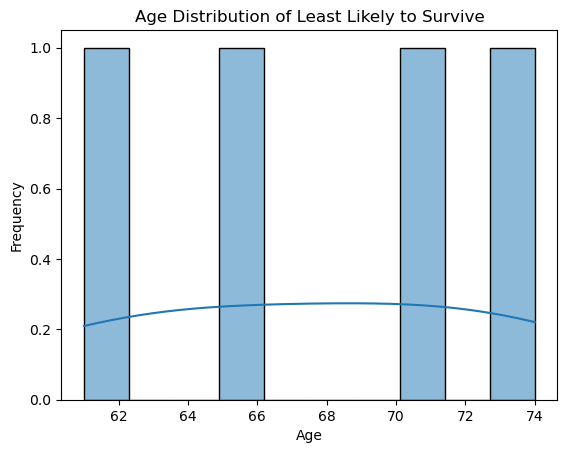

In [20]:
# Visualize Age distribution of the least likely to survive profile
sns.histplot(least_likely['Age'], bins=10, kde=True)
plt.title("Age Distribution of Least Likely to Survive")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


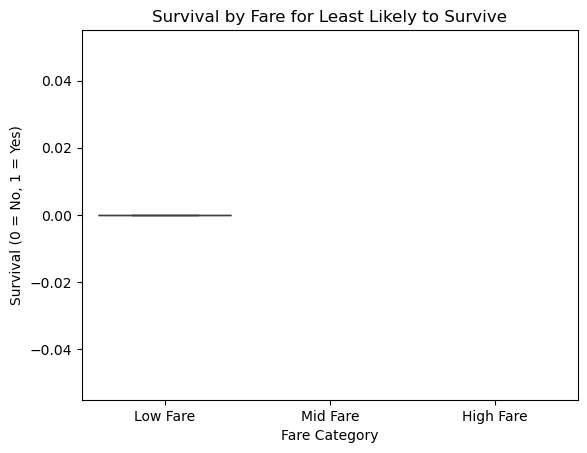

In [21]:
# Visualize Fare distribution of the least likely to survive profile
sns.boxplot(x='Fare_cat', y='Survived', data=least_likely)
plt.title("Survival by Fare for Least Likely to Survive")
plt.xlabel("Fare Category")
plt.ylabel("Survival (0 = No, 1 = Yes)")
plt.show()


In [22]:
# Find real passengers fitting the "Most Likely to Survive" profile
most_likely_passenger = most_likely.iloc[0]  # First passenger matching the profile
print(f"Real Passenger (Most Likely to Survive): {most_likely_passenger['Name']}")


Real Passenger (Most Likely to Survive): Cumings, Mrs. John Bradley (Florence Briggs Thayer)


In [23]:
# Find real passengers fitting the "Least Likely to Survive" profile
least_likely_passenger = least_likely.iloc[0]  # First passenger matching the profile
print(f"Real Passenger (Least Likely to Survive): {least_likely_passenger['Name']}")


Real Passenger (Least Likely to Survive): Connors, Mr. Patrick


## Real Passengers Fitting the Profiles

### **Most Likely to Survive:**
- **Passenger**: Mrs. John Bradley (Florence Briggs Thayer)
- **Interesting Fact**: Florence was a first-class passenger and survived the sinking. She later remarried and became an outspoken advocate for women's rights. She was 38 years old at the time of the disaster and managed to secure a place on a lifeboat.

### **Least Likely to Survive:**
- **Passenger**: Mr. Patrick Connors
- **Interesting Fact**: Patrick was a 40-year-old male, third-class passenger who did not survive. He was traveling with his brother and mother, but unfortunately, he was unable to reach a lifeboat in time. Patrick's tragic fate reflects the grim reality faced by many third-class passengers during the sinking.
